<a href="https://colab.research.google.com/github/MPadliSandi4212201085/Measure-size-of-objects-in-an-image-using-OpenCV/blob/main/M_Padli_Sandi_4212201085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut, cross_val_predict

In [40]:
# Load the dataset
data_uji = pd.read_csv('../content/emnist-mnist-test.csv', header=None)
data_latih = pd.read_csv('../content/emnist-mnist-train.csv', header=None)


In [4]:
latih_1 = data_latih.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
latih_2 = data_latih.iloc[:, 0].values.astype('int')
uji_1 = data_uji.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
uji_2 = data_uji.iloc[:, 0].values.astype('int')

In [5]:
# Bagi dataset menjadi data latih dan uji
X_train, y_train = np.array(latih_1[:1000]), np.array(latih_2[:1000])
X_test, y_test = np.array(uji_1[:10]), np.array(uji_2[:10])

In [41]:
hog_features_latih = []
hog_images_latih = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (4,4), cells_per_block = (2,2), visualize = True, block_norm = 'L2' )
    hog_features_latih.append(feature)
    hog_images_latih.append(hog_img)

hog_features_latih_np = np.array(hog_features_latih)
hog_images_latih_np = np.array(hog_images_latih)

hog_features_uji = []
hog_images_uji = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (4,4), cells_per_block = (2,2), visualize = True, block_norm = 'L2' )
    hog_features_uji.append(feature)
    hog_images_uji.append(hog_img)

hog_features_uji_np = np.array(hog_features_uji)
hog_images_uji_np = np.array(hog_images_uji)

In [19]:
scaler = StandardScaler()
hog_features_latih_scaled = scaler.fit_transform(hog_features_latih_np)
hog_features_uji_scaled = scaler.transform(hog_features_uji_np)

In [22]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(hog_features_latih_scaled, y_train)

SVC(C=1, kernel='linear')

In [24]:
loo = LeaveOneOut()
y_pred = cross_val_predict(svm_model, hog_features_latih_scaled, y_train, cv = loo)


In [26]:
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average = 'weighted')
loo_recall = recall_score(y_train, y_pred, average = 'weighted')
loo_f1 = f1_score(y_train, y_pred, average = 'weighted')

In [42]:
print("\nLOOCV Result Data Training :")
print("Confusion Matrix :")
print(loo_confusion_matrix)
print("Accuracy :", loo_accuracy)
print("Precision :", loo_precision)
print("Recall :", loo_recall)
print("F1 :", loo_f1)


LOOCV Result Data Training :
Confusion Matrix :
[[ 93   1   3   0   0   0   0   0   0   0]
 [  0 107   1   0   0   0   0   0   0   0]
 [  2   1  93   4   2   0   0   3   0   0]
 [  0   0   5  94   0   1   0   1   3   2]
 [  0   2   1   0  81   1   0   0   1   2]
 [  0   0   0   3   1  86   1   0   1   1]
 [  1   1   0   0   0   2  97   0   0   0]
 [  0   1   2   1   2   1   0  88   1   2]
 [  1   0   2   2   0   1   1   0 109   2]
 [  1   0   0   1   1   1   0   1   0  81]]
Accuracy : 0.929
Precision : 0.9293387189709787
Recall : 0.929
F1 : 0.9289694480330135


In [28]:
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize = (10, 10))
    plot_confusion_matrix(conf_mat = cm, ax = ax, cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

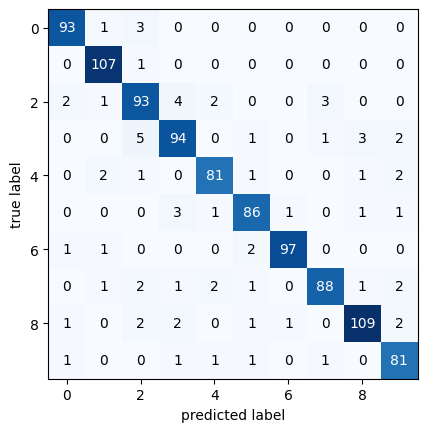

In [48]:
plot_confusion_matrix(loo_confusion_matrix)

In [49]:
def plot_images_with_hog(x, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize = (15, 5))
    fig.suptitle(title)

    for i in range(min(len(x), 10)):
        axes[0, i].imshow(x[i].reshape((28, 28)), cmap = 'gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap = 'gray')
        axes[1, i].axis('off')

    plt.show()

In [50]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, block_norm = 'L2')
        hog_images.append(hog_img)

    return np.array(hog_images)


In [51]:
hog_images_train = extract_hog_images(X_train)

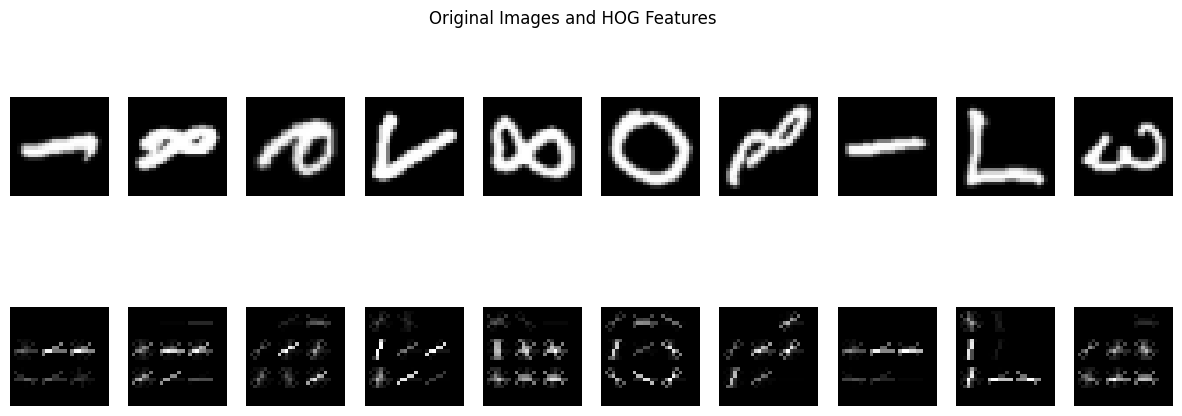

In [53]:
plot_images_with_hog(X_train, hog_images_train, title = "Original Images and HOG Features")